<a href="https://colab.research.google.com/github/vajiha110/FMML_IIITH_PROJECTS/blob/main/AIML_Module_4_Lab_2(2)_Introduction_to_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent continuation





# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



2.  Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

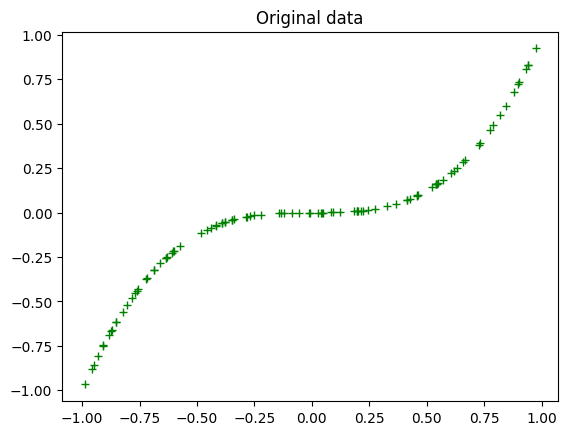

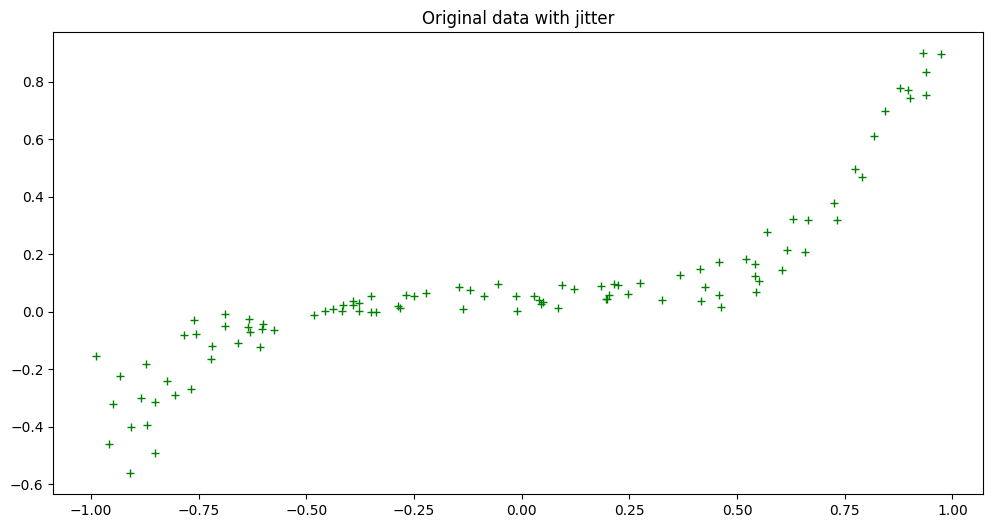

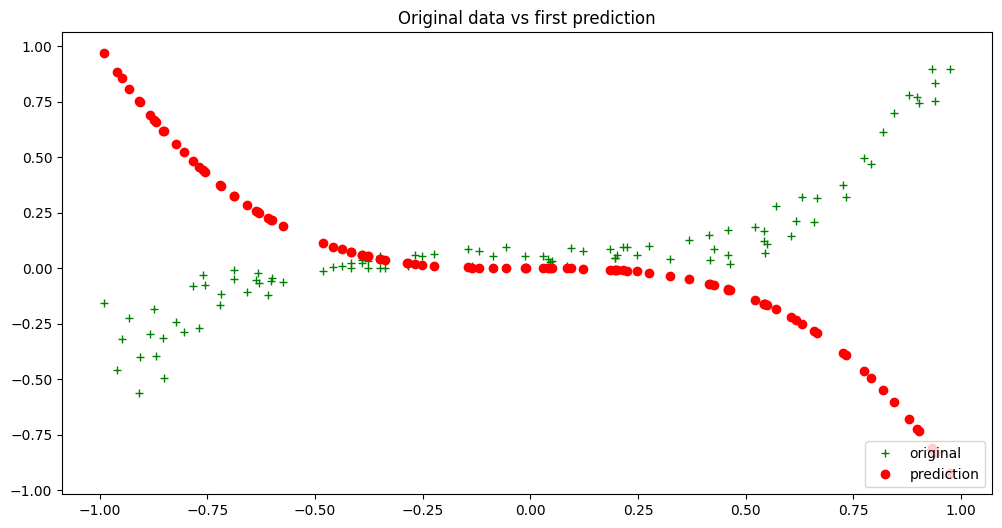

In [ ]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)



def eval_3rd_degree(coeffs, x):
    """
    Function to return the output of evaluating a third degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, c, d for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x * x)
    b = coeffs[1] * (x * x)
    c = coeffs[2] * (x)
    d = coeffs[3]
    y = a + b + c + d
    return y

hundred_xs = np.random.uniform(-1, 1, 100)
coeffs = [1, 0, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_3rd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()


def eval_3rd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a third degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, c, d for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the third degree polynomial.

    """

    a = coeffs[0] * (x * x * x)
    b = coeffs[1] * (x * x)
    c = coeffs[2] * (x)
    d = coeffs[3]
    y = a + b + c + d

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_3rd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)

plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()



def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

rand_coeffs = (random.randrange(-1, 1), random.randrange(-1, 1), random.randrange(-1, 1),random.randrange(-1, 1))
y_bar = eval_3rd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

def calc_gradient_3rd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a third degree polynomial.

    Args:
        coeffs: a,b,c,d for a 3rd degree polynomial [ y = ax^3 + bx^2 + cx+d ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 3rd degree polynomial, as a tuple of its parts for a,b,c,d respectively.

    """

    a_s = []
    b_s = []
    c_s = []
    d_s = []

    y_bars = eval_3rd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_cubed = x**3
        x_squared = x ** 2
        partial_a = x_cubed * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_squared * (y - y_bar)
        b_s.append(partial_b)
        partial_c =x* (y - y_bar)
        c_s.append(partial_c)
        partial_d =(y - y_bar)
        d_s.append(partial_d)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)

    return (gradient_a, gradient_b, gradient_c,gradient_d)   # return calculated gradients as a a tuple of its 4 parts



In [ ]:
calc_grad = calc_gradient_3rd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.1               #here we are using learning rate=0.1   lets see chnages in loss when we use different lr
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]
d_new = rand_coeffs[3] - lr * calc_grad[3]
new_model_coeffs = (a_new, b_new, c_new, d_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_3rd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")


New model coeffs: (-0.9496718809201177, 0.0015830498671800027, 0.07058932800654076, 0.00700619067532602)
Now have smaller model loss: 0.36687151803070184 vs 0.43892538724736613


lets see for different learning rates

In [ ]:
calc_grad = calc_gradient_3rd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.01              #here we are using learning rate=0.1   lets see chnages in loss when we use different lr
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]
d_new = rand_coeffs[3] - lr * calc_grad[3]
new_model_coeffs = (a_new, b_new, c_new, d_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_3rd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-0.9949671880920118, 0.00015830498671800028, 0.0070589328006540756, 0.000700619067532602)
Now have smaller model loss: 0.4313942195573243 vs 0.43892538724736613


In [ ]:
calc_grad = calc_gradient_3rd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.001               #here we are using learning rate=0.1   lets see chnages in loss when we use different lr
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]
d_new = rand_coeffs[3] - lr * calc_grad[3]
new_model_coeffs = (a_new, b_new, c_new, d_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_3rd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-0.9994967188092012, 1.5830498671800026e-05, 0.0007058932800654076, 7.00619067532602e-05)
Now have smaller model loss: 0.4381690126706784 vs 0.43892538724736613


In [ ]:
calc_grad = calc_gradient_3rd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001               #here we are using learning rate=0.1   lets see chnages in loss when we use different lr
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]
d_new = rand_coeffs[3] - lr * calc_grad[3]
new_model_coeffs = (a_new, b_new, c_new, d_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_3rd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-0.9999496718809201, 1.5830498671800028e-06, 7.058932800654075e-05, 7.00619067532602e-06)
Now have smaller model loss: 0.4388497172116206 vs 0.43892538724736613


In [ ]:
calc_grad = calc_gradient_3rd_poly(rand_coeffs, hundred_xs, ys)

lr = 1.0               #here we are using learning rate=0.1   lets see chnages in loss when we use different lr
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]
d_new = rand_coeffs[3] - lr * calc_grad[3]
new_model_coeffs = (a_new, b_new, c_new, d_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_3rd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-0.49671880920117684, 0.015830498671800027, 0.7058932800654075, 0.0700619067532602)
Now have smaller model loss: 0.04416746345626311 vs 0.43892538724736613


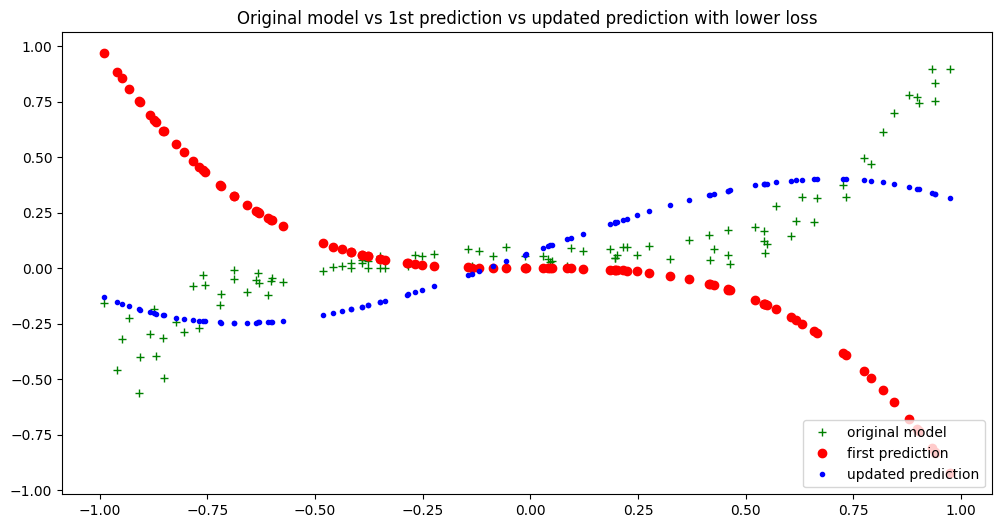

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

def calc_gradient_3rd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b,c,d for a 2nd degree polynomial [ y = ax^3 + bx^2 + cx + d ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 3rd degree polynomial, as a tuple of its parts for a,b,c,d respectively.

    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []

    y_bars = eval_3rd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_cubed = x**3
        x_squared = x ** 2
        partial_a = x_cubed * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_squared * (y - y_bar)
        b_s.append(partial_b)
        partial_c =x* (y - y_bar)
        c_s.append(partial_c)
        partial_d =(y - y_bar)
        d_s.append(partial_d)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)



    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[2] - lr * gradient_d


    new_model_coeffs = (a_new, b_new, c_new, d_new)

    # update with these new coeffs:
    new_y_bar = eval_3rd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar



[0.24448249748907588, 0.17299258623040867, 0.12328691153050492, 0.13655339400946423, 0.12590568605748767, 0.14127147742755602, 0.1385863097259939, 0.1458473171237734, 0.1437641216761939, 0.14545595850236118, 0.14296095641592838, 0.14197933313109412, 0.1392945275069358, 0.13728579020589696, 0.13465324788343586, 0.13236386018997218, 0.1298841102601373, 0.1275978603791932, 0.12528023630377072, 0.12307958475134088, 0.12089795216806375, 0.11879066762829883, 0.11671365135221054, 0.11468656181159825, 0.11268908805223252, 0.1107278024393571, 0.1087933021917098, 0.10688768941565545, 0.10500672986084739, 0.10315117348176321, 0.10131927209923748, 0.09951144790843365, 0.09772713247769146, 0.09596669212084757, 0.0942300835635034, 0.09251764787873044, 0.09082953600461799, 0.08916603670787865, 0.08752733100471566, 0.08591362880810609, 0.08432506495037043, 0.08276175757610256, 0.08122376548308742, 0.07971111456291252, 0.07822378171631697, 0.07676170815562113, 0.07532479471530486, 0.07391290958669122, 

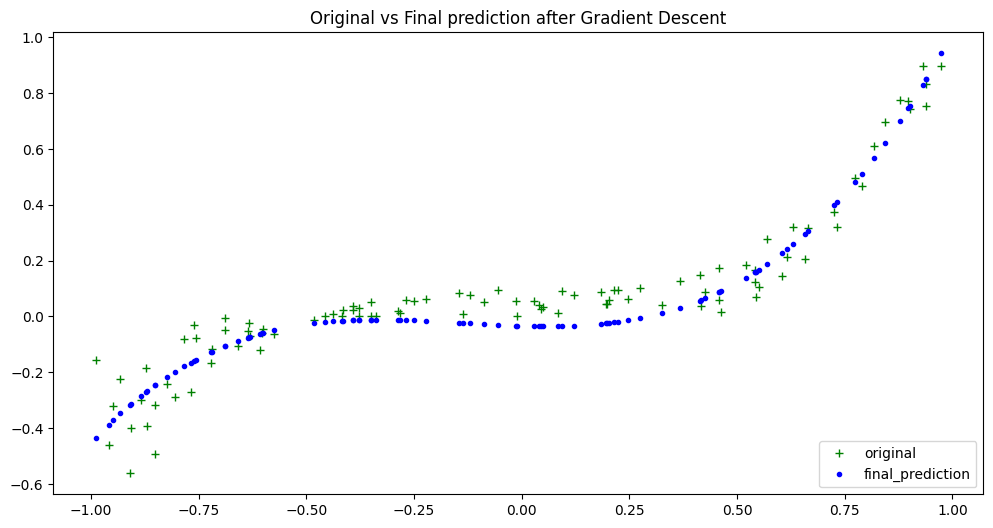

Final Coefficients predicted: (0.7825152136689122, 0.3158027055505622, -0.04744656256258393, -0.03293549267695322)
Original Coefficients: [1, 0, 0, 0]


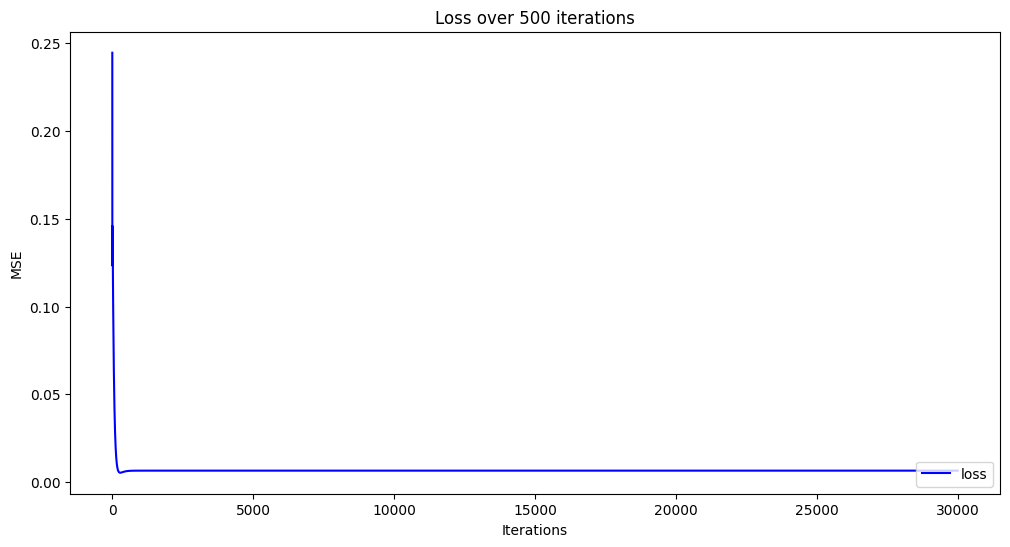

In [ ]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a third degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_3rd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

GD = gradient_descent(30000,0.3)     # lets try with different the lr values
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()


print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")


plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

here first we have taken 0.3 as lr value we can see that the loss has reached to zero
lets try with diff. values  and see what changes it does

[0.4313942195573243, 0.42360490698988257, 0.4160419969652581, 0.4086911028692771, 0.40154752892200174, 0.39460651237392397, 0.3878633892493053, 0.3813135898262779, 0.3749526369233782, 0.3687761441756199, 0.3627798143413581, 0.35695943763892574, 0.35131089011254246, 0.34583013202700613, 0.3405132062906756, 0.3353562369062741, 0.3303554274490406, 0.3255070595717624, 0.3208074915362451, 0.3162531567707622, 0.3118405624530522, 0.30756628811842635, 0.3034269842925637, 0.2994193711485733, 0.2955402371879148, 0.2917864379447688, 0.2881548947134613, 0.2846425932985514, 0.2812465827871924, 0.2779639743433928, 0.2747919400238017, 0.2717277116146509, 0.26876857948949606, 0.2659118914874002, 0.2631550518112107, 0.2604955199455884, 0.257930809594449, 0.25545848763748635, 0.2530761731054524, 0.2507815361738686, 0.24857229717485907, 0.24644622562678858, 0.2444011392814047, 0.2424349031881827, 0.2405454287755763, 0.23873067294888428, 0.23698863720444963, 0.23531736675990605, 0.2337149497001999, 0.2321

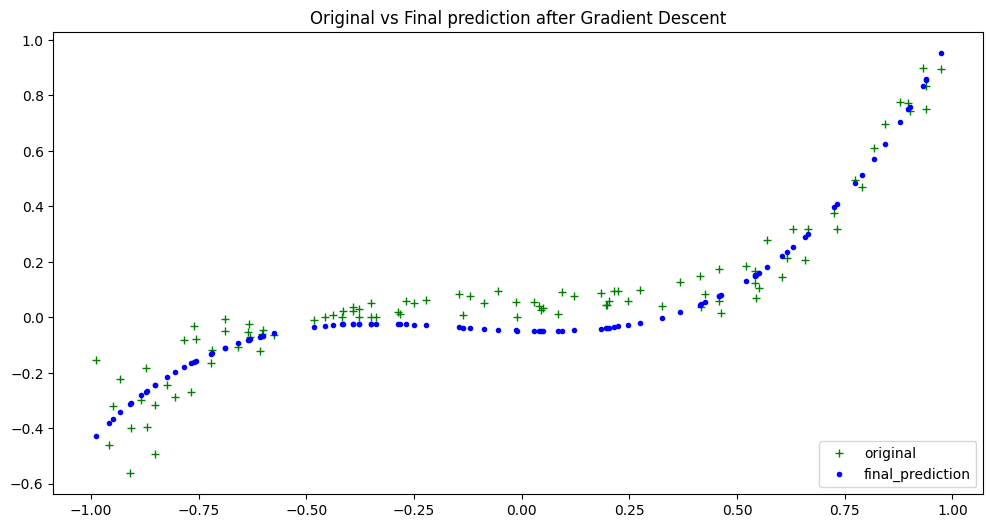

Final Coefficients predicted: (0.7841410010064456, 0.34011889094723435, -0.048154236962975466, -0.04754993483012152)
Original Coefficients: [1, 0, 0, 0]


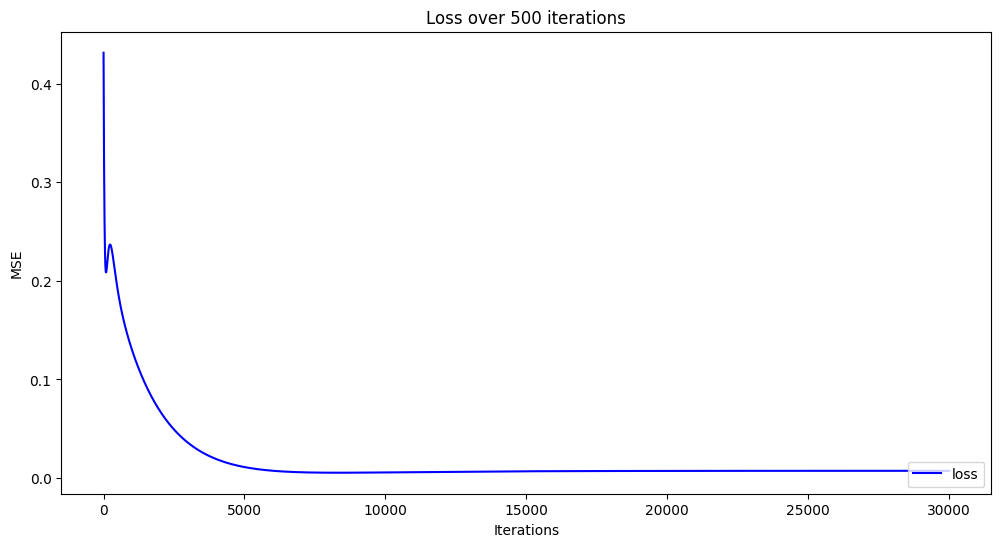

In [ ]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a third degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_3rd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

GD = gradient_descent(30000,0.01)     # lets try with different the lr values
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()


print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")


plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

above we have tried with lr=0.01 we can see that loss is not reduced to zero it is far away from zero

[0.4381690126706784, 0.43736997588844845, 0.4365732855832464, 0.4357788420598969, 0.43498664034616946, 0.4341966752832539, 0.433408941723188, 0.432623434528426, 0.43184014857182235, 0.4310590787366102, 0.4302802199163828, 0.4295035670150746, 0.4287291149469419, 0.42795685863654337, 0.42718679301872015, 0.4264189130385779, 0.4256532136514675, 0.424889689822965, 0.42412833652885396, 0.423369148755105, 0.42261212149785704, 0.42185724976340006, 0.42110452856815345, 0.42035395293864947, 0.4196055179115126, 0.4188592185334425, 0.4181150498611928, 0.4173730069615554, 0.4166330849113393, 0.41589527879735244, 0.4151595837163835, 0.414425994775183, 0.4136945070904452, 0.412965115788789, 0.412237816006738, 0.41151260289070607, 0.41078947159697404, 0.4100684172916747, 0.40934943515077243, 0.4086325203600469, 0.40791766811507174, 0.40720487362119906, 0.4064941320935397, 0.40578543875694484, 0.4050787888459897, 0.40437417760495237, 0.4036716002877976, 0.40297105215815887, 0.40227252848931905, 0.4015

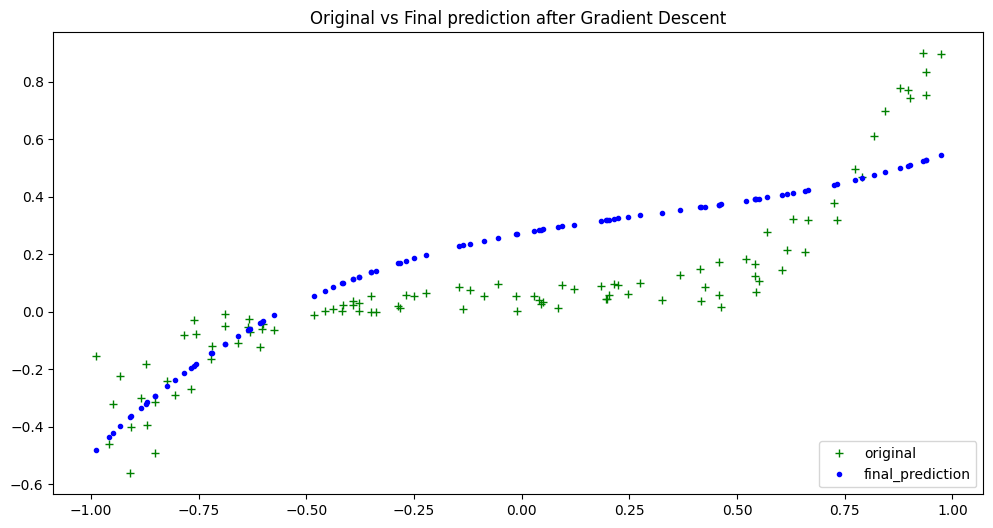

Final Coefficients predicted: (0.2551474646655396, -0.24149117167625578, 0.2729093565965993, 0.27274684320655884)
Original Coefficients: [1, 0, 0, 0]


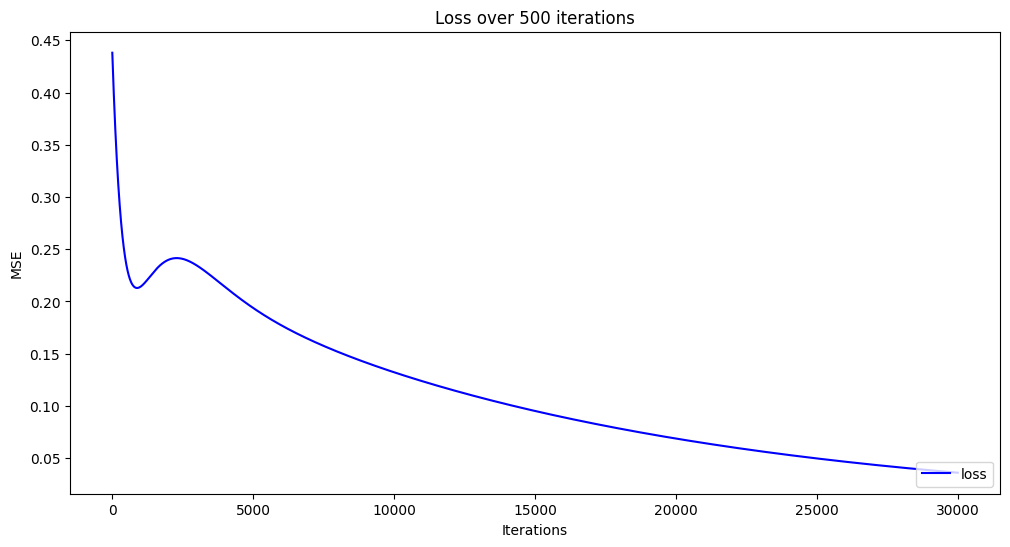

In [ ]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a third degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_3rd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

GD = gradient_descent(30000,0.001)     # lets try with different the lr values
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()


print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")


plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

here also we can see that loss is not zero when lr=0.001

[0.4388497172116206, 0.4387696112856407, 0.4386895289075647, 0.4386094691279848, 0.43852943194190047, 0.43844941734411114, 0.43836942532941836, 0.4382894558926237, 0.43820950902853106, 0.4381295847319442, 0.43804968299766833, 0.4379698038205106, 0.4378899471952779, 0.4378101131167786, 0.43773030157982185, 0.43765051257921933, 0.437570746109782, 0.43749100216632203, 0.43741128074365415, 0.43733158183659254, 0.4372519054399532, 0.43717225154855305, 0.4370926201572096, 0.43701301126074255, 0.43693342485397096, 0.4368538609317168, 0.4367743194888014, 0.4366948005200487, 0.4366153040202828, 0.43653582998432827, 0.4364563784070123, 0.43637694928316123, 0.4362975426076041, 0.436218158375171, 0.4361387965806906, 0.43605945721899636, 0.4359801402849198, 0.43590084577329546, 0.43582157367895646, 0.43574232399673996, 0.435663096721482, 0.4355838918480208, 0.435504709371195, 0.4354255492858447, 0.4353464115868103, 0.4352672962689347, 0.43518820332706026, 0.4351091327560316, 0.4350300845506931, 0.4

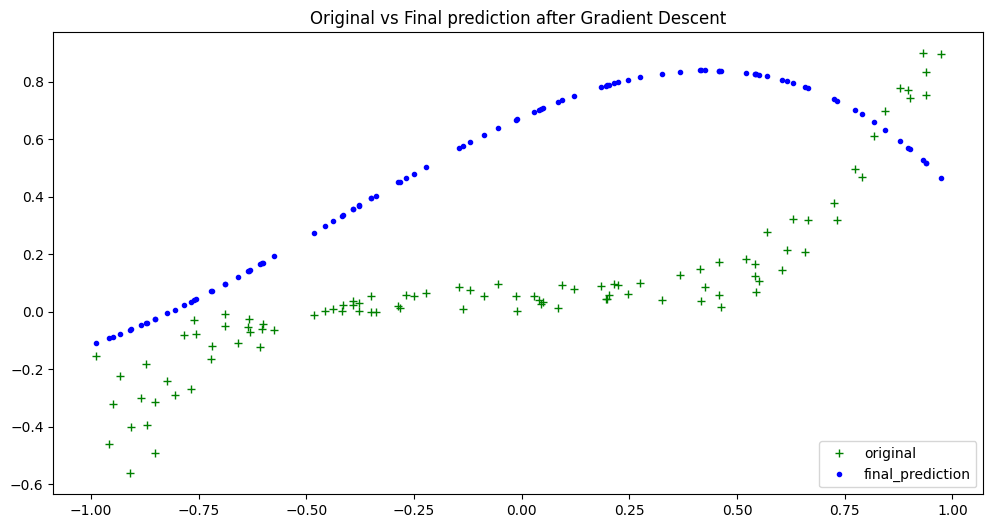

Final Coefficients predicted: (-0.40669128433842733, -0.5198987370999035, 0.6763411620016772, 0.6762611916474282)
Original Coefficients: [1, 0, 0, 0]


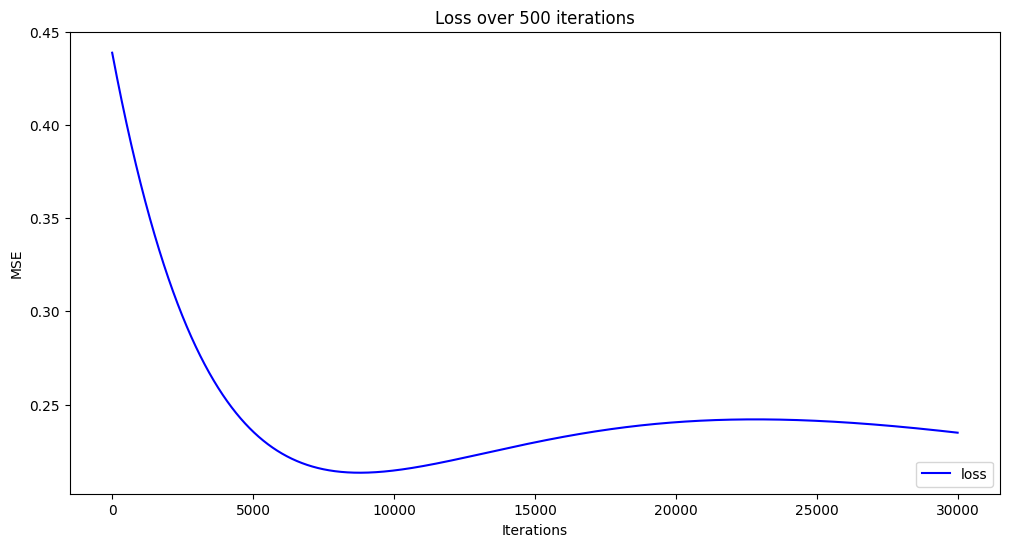

In [ ]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a third degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_3rd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

GD = gradient_descent(30000,0.0001)     # lets try with different the lr values
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()


print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")


plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

when we are using lr=0.0001 also we are not getting loss as zero .
now lets check for 1.0

<ipython-input-1-6ba6dd4f1c28>:105: RuntimeWarning: overflow encountered in double_scalars
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-1-6ba6dd4f1c28>:105: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-7-0cf4e46f5b26>:47: RuntimeWarning: overflow encountered in double_scalars
  gradient_d = (-2 / n) * sum(d_s)
<ipython-input-7-0cf4e46f5b26>:44: RuntimeWarning: invalid value encountered in double_scalars
  gradient_a = (-2 / n) * sum(a_s)
<ipython-input-7-0cf4e46f5b26>:46: RuntimeWarning: invalid value encountered in double_scalars
  gradient_c = (-2 / n) * sum(c_s)


[0.04416746345626311, 0.489276052645871, 0.8467261995054101, 6.586430658323888, 27.739600832510302, 151.28301860151015, 743.7862880325334, 3817.896904765741, 19252.30775502153, 97807.32551486373, 495343.2878189476, 2511956.40316304, 12731410.854542797, 64542135.8477791, 327164854.7860065, 1658473208.6336107, 8407026060.292824, 42616687275.52693, 216030737470.45364, 1095095565747.3264, 5551217346590.023, 28140029874729.766, 142646404417003.25, 723097940364267.9, 3665501581105355.5, 1.8581026449420556e+16, 9.419025882854632e+16, 4.774658114863523e+17, 2.4203522086382597e+18, 1.2269160795557669e+19, 6.219438066574179e+19, 3.152734772204672e+20, 1.598172766937403e+21, 8.10139887288345e+21, 4.106731453262854e+22, 2.0817692714398976e+23, 1.0552828566535778e+24, 5.349401217633558e+24, 2.7116988783424988e+25, 1.3746044664896682e+26, 6.968094630213011e+26, 3.5322410161809906e+27, 1.7905506825773185e+28, 9.07659395888128e+28, 4.60107377557254e+29, 2.3323594714234208e+30, 1.1823111232902624e+31, 

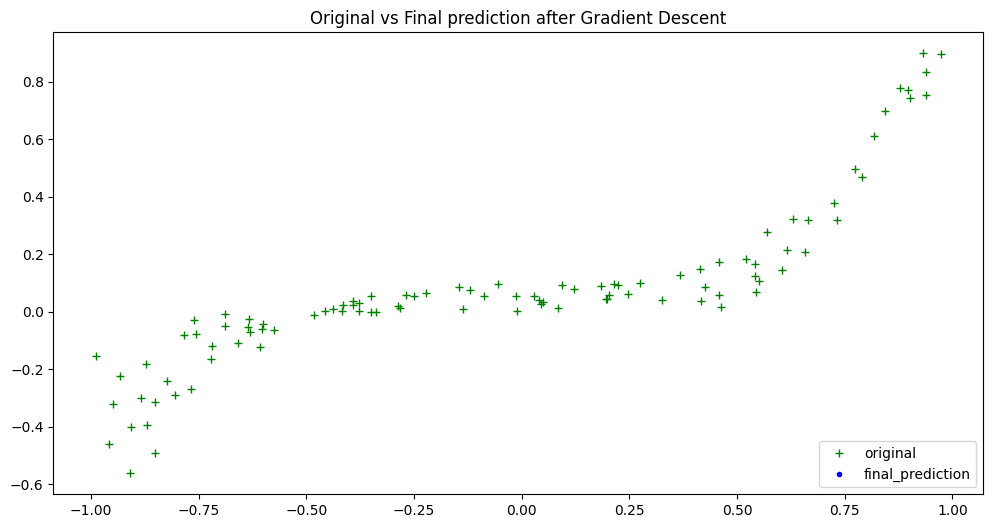

Final Coefficients predicted: (nan, nan, nan, nan)
Original Coefficients: [1, 0, 0, 0]


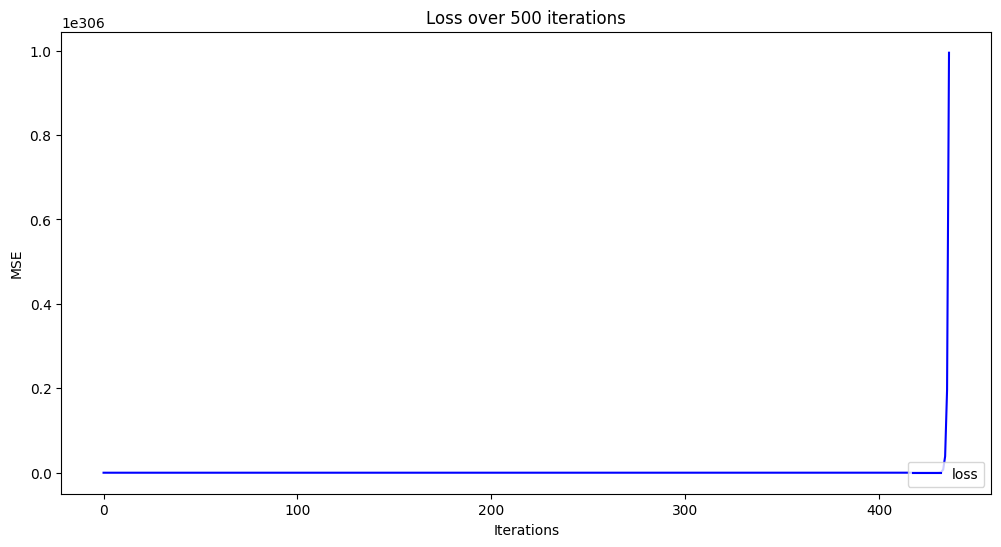

In [ ]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a third degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_3rd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

GD = gradient_descent(30000,1.0)     # lets try with different the lr values
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()


print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")


plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

here we can see a bog difference when we are using lr=1.0 we are not getting the final prediction values aslo the loss is greater than any loss we are getting when we are using lr=0.1,0.01,0.001,0.0001


here by seeing all the outputs with diff.lr values we can say that lr=0.1 is the best value as we can see that loss becoming zero

Also here when we are taking the huge learing rate i.e. lr=1.0 the model is not converging at all, and aslo  diverging and moving away from the optimal parameters.